## Data Description

* The dataset contains the employment outcomes of engineering graduates.
* Salary, Job Titles, and Job Locations are the dependant variables.
* The standardized scores are from following areas:
    1. Cognitive skills
    2. Technical skills
    3. Personality skills
* The dataset also contains demographic features.
* There are 3998 rows and 39 columns in the dataset

#### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np

import statistics
from statistics import*

import datetime


import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
import plotly.figure_factory as ff
from plotly.figure_factory import*

import chart_studio
import chart_studio.plotly as py

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [5]:
df.shape

(3998, 39)

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [7]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [8]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

In [9]:
score_columns = ['ComputerProgramming','ElectronicsAndSemicon','ComputerScience',
                 'MechanicalEngg','ElectricalEngg','TelecomEngg','CivilEngg']
df[score_columns] = df[score_columns].replace(-1,0)

In [10]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [11]:
df['AMCAT_Score'] = df['ComputerProgramming']+df['ElectronicsAndSemicon']+df['ComputerScience']+df['MechanicalEngg']+df[
    'ElectricalEngg']+df['TelecomEngg']+df['CivilEngg']

In [12]:
df['AMCAT_Score'] = df['AMCAT_Score'].replace(0,np.nan)

In [13]:
df.isnull().sum()

Unnamed: 0                 0
ID                         0
Salary                     0
DOJ                        0
DOL                        0
Designation                0
JobCity                    0
Gender                     0
DOB                        0
10percentage               0
10board                    0
12graduation               0
12percentage               0
12board                    0
CollegeID                  0
CollegeTier                0
Degree                     0
Specialization             0
collegeGPA                 0
CollegeCityID              0
CollegeCityTier            0
CollegeState               0
GraduationYear             0
English                    0
Logical                    0
Quant                      0
Domain                     0
ComputerProgramming        0
ElectronicsAndSemicon      0
ComputerScience            0
MechanicalEngg             0
ElectricalEngg             0
TelecomEngg                0
CivilEngg                  0
conscientiousn

In [14]:
# Removing Rows having null values 
df = df.dropna(subset = ['AMCAT_Score']).reset_index(drop='False')

In [15]:
# Removing unwanted columns
columns = ['Unnamed: 0','ID','CollegeID','CollegeCityID','CollegeCityTier','DOL']
df = df.drop(columns,axis=1)

In [16]:
# Shape of dataset
df.shape

(3868, 34)

In [17]:
# Extracting Joining year and Birth year
df['Joining_year'] = df['DOJ'].dt.year
df['Birth_Year'] = df['DOB'].dt.year

In [18]:
df.head()

,Salary,DOJ,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,AMCAT_Score,Joining_year,Birth_Year
0,420000,2012-06-01,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",2,B.Tech/B.E.,computer engineering,78.00,Andhra Pradesh,2011,515,585,525,0.635979,445,0,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,445.0,2012,1990
1,500000,2013-09-01,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,2,B.Tech/B.E.,electronics and communication engineering,70.06,Madhya Pradesh,2012,695,610,780,0.960603,0,466,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,466.0,2013,1989
2,325000,2014-06-01,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,2,B.Tech/B.E.,information technology,70.00,Uttar Pradesh,2014,615,545,370,0.450877,395,0,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,395.0,2014,1992
3,1100000,2011-07-01,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,1,B.Tech/B.E.,computer engineering,74.64,Delhi,2011,635,585,625,0.974396,615,0,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,615.0,2011,1989
4,200000,2014-03-01,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,2,B.Tech/B.E.,electronics and communication engineering,73.90,Uttar Pradesh,2012,545,625,465,0.124502,0,233,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,233.0,2014,1991


### Function to measure Central Tendency

In [19]:
def central_tendency(column):
    print('Mean(Average) for {} is:        '.format(column),df[column].mean())
    print('Median for {} is:               '.format(column),df[column].median())
    print('Mode(Mostly repeated) for {} is:'.format(column),df[column].mode()[0])

### Function to measure Spread

In [20]:
def spread(column):
    Q1 = df[column].quantile(q=0.25)
    Q2 = df[column].quantile(q=0.5)
    Q3 = df[column].quantile(q=0.75)
    IQR = Q3-Q1
    Upper_Bound = Q3 + 1.5*IQR
    Lower_Bound = Q1 - 1.5*IQR
    Range = df[column].max()-df[column].min()
    print('The Range is:                ',Range)
    print('The Quartiles Q1, Q2, Q3 are: ({},{},{})'.format(Q1,Q2,Q3))
    print('The Inter-Quartile Range is  ',IQR)
    print('The Lower and Upper Bound is: ({},{})'.format(Lower_Bound,Upper_Bound))
    print('Variance is:                 ',variance(df[column]))
    print('Standard Deviation is:       ',stdev(df[column]))

### Function to find % of employees more than average of specific column

In [21]:
def morethan_average(column):
    average_score = df[df[column]>=df[column].mean()]
    count = average_score[column].count()
    average = df[column].count()
    print('% of employees having more than average {}: '.format(column),(count/average)*100)

## 1. Boxplot for Salary

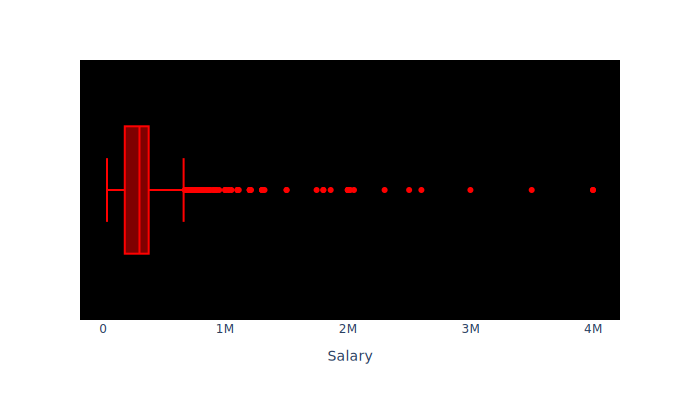

In [119]:
df1 = df
df1[' '] = ' '
fig = px.box(df1,x='Salary',color=' ',color_discrete_map={
                " ": "red"},height=400)
fig.update_layout(plot_bgcolor='black',showlegend=False)

fig.update_xaxes(showgrid=False,zeroline=False)
fig.update_yaxes(showgrid=False)
fig.show(renderer="svg")

In [23]:
morethan_average('Salary')

% of employees having more than average Salary:  45.19131334022751


#### Observation:
* There are more employees with salary greater than maxima. These are outliers
* There are employees with a higher salary of 4M. These employees may have more experience in their respective field.
* The median salary is 300K and the minimum salary is 35K.

#### Measure of Central Tendency

In [24]:
central_tendency('Salary')

Mean(Average) for Salary is:         308754.9120992761
Median for Salary is:                300000.0
Mode(Mostly repeated) for Salary is: 300000


#### Measure of Spread

In [25]:
spread('Salary')

The Range is:                 3965000
The Quartiles Q1, Q2, Q3 are: (180000.0,300000.0,375000.0)
The Inter-Quartile Range is   195000.0
The Lower and Upper Bound is: (-112500.0,667500.0)
Variance is:                  46068763810.879265
Standard Deviation is:        214636.3524915555


#### Measures of Shape


In [26]:
df['Salary'].skew()

6.474920879132869

* The skewness is 6.47 which is greater than 1.
* Here, the distribution is highly positive skewed.

In [27]:
df['Salary'].kurt()

80.5752139170702

* The Kurtosis for salary is 80.57 which is greater than 3.
* Hence it is a Leptokurtic.
* The tail is long and the central peak is taller and sharper

## 2. Boxplot for AMCAT_Score

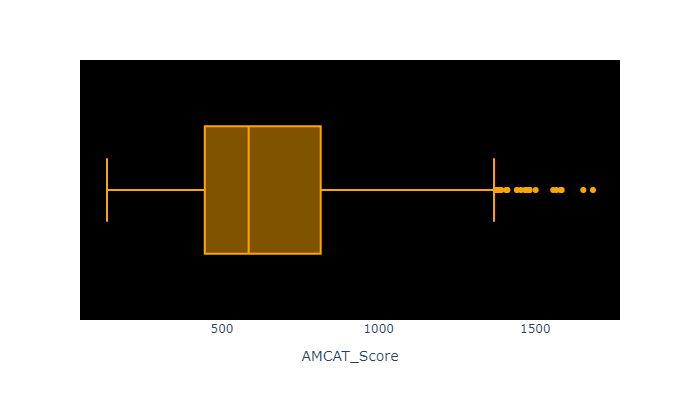

In [28]:
fig2 = px.box(df1,x='AMCAT_Score',color=' ',color_discrete_map={
                " ": "orange"},height=400)
fig2.update_layout(plot_bgcolor='black',showlegend=False)

fig2.update_xaxes(showgrid=False)
fig2.update_yaxes(showgrid=False)
fig2.show('png')

#### Observation:
* The highest score in AMCAT is 1684.
* The median score is 585.

In [29]:
morethan_average('AMCAT_Score')

% of employees having more than average AMCAT_Score:  44.33815925542916


#### Measure of Central Tendency

In [30]:
central_tendency('AMCAT_Score')

Mean(Average) for AMCAT_Score is:         639.4570837642192
Median for AMCAT_Score is:                585.0
Mode(Mostly repeated) for AMCAT_Score is: 435.0


#### Measure of Spread

In [31]:
spread('AMCAT_Score')

The Range is:                 1551.0
The Quartiles Q1, Q2, Q3 are: (445.0,585.0,815.0)
The Inter-Quartile Range is   370.0
The Lower and Upper Bound is: (-110.0,1370.0)
Variance is:                  61545.6167250853
Standard Deviation is:        248.08389049893043


#### Measures of Shape


In [32]:
df['AMCAT_Score'].skew()

0.6510910621150946

* The skewness for AMCAT_Score is 0.65 which lies in between 0.5 and 1.
* Hence the distribution is moderately skewed.

In [33]:
df['AMCAT_Score'].kurt()

0.003976783098158521

* The Kurtosis for Amcat Score is 0.0039 which is less than 3.
* Hence it is a Platykurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.
* Compared to a Normal distribution, the tails are shorter and central peak is lower and broader

## 3. Boxplot for AGE

In [34]:
df['Current Year'] = datetime.datetime.now().year

In [35]:
df['Age'] = df['Current Year'] - df['Birth_Year']

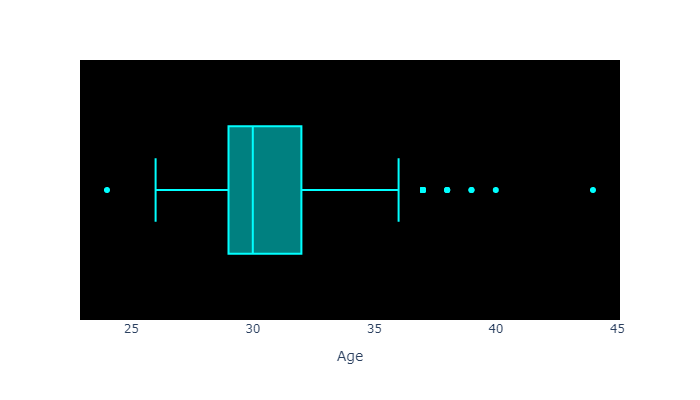

In [36]:
fig3 = px.box(df1,x='Age',color=' ',color_discrete_map={
                " ": "cyan"},height=400)
fig3.update_layout(plot_bgcolor='black',showlegend=False)

fig3.update_xaxes(showgrid=False)
fig3.update_yaxes(showgrid=False)
fig3.show('png')

In [37]:
morethan_average('Age')

% of employees having more than average Age:  45.81178903826267


#### Observation:
* The max employee age is 44
* The median Age is 30

#### Measure of Central Tendency

In [38]:
central_tendency('Age')

Mean(Average) for Age is:         30.574974146845914
Median for Age is:                30.0
Mode(Mostly repeated) for Age is: 30


#### Measure of Spread

In [39]:
spread('Age')

The Range is:                 20
The Quartiles Q1, Q2, Q3 are: (29.0,30.0,32.0)
The Inter-Quartile Range is   3.0
The Lower and Upper Bound is: (24.5,36.5)
Variance is:                  3.117470260515822
Standard Deviation is:        1.765635936572379


#### Measure of Shape

In [40]:
df['Age'].skew()

0.8885119420216195

* The skewness for Age is 0.88 which is between 0.5 than 1
* The distribution is moderately skewed

In [41]:
df['Age'].kurt()

1.827407487815286

* The Kurtosis for Age is 1.82 which is less than 3.
* Hence it is a Playtkurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.
* Compared to a Normal distribution, the tails are shorter and central peak is lower and broader

##  4. Distplot for 12th Percentage

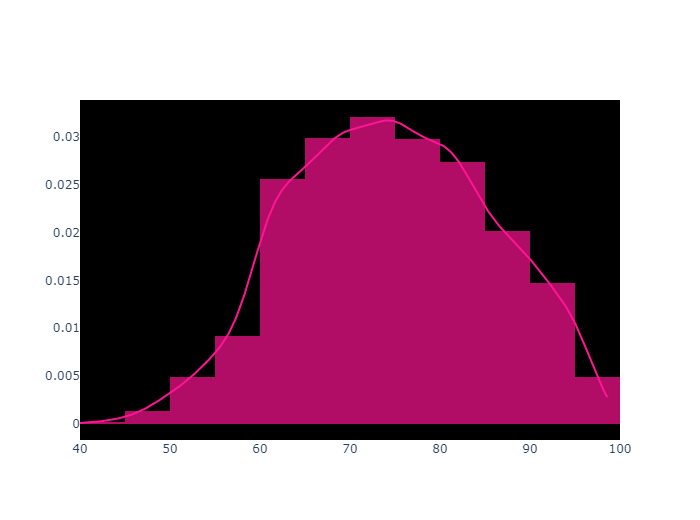

In [42]:
group_labels = ['12Percentage']
fig_4 = ff.create_distplot([df['12percentage']],group_labels,colors=['deeppink'],show_rug=False,bin_size=[5])
fig_4.update_layout(plot_bgcolor='black',showlegend=False,height=520)
fig_4.update_xaxes(showgrid=False)
fig_4.update_yaxes(showgrid=False,zeroline=False)
fig_4.show('png')

In [43]:
morethan_average('12percentage')

% of employees having more than average 12percentage:  49.560496380558426


#### Measure of Central Tendency

In [44]:
central_tendency('12percentage')

Mean(Average) for 12percentage is:         74.54227766287474
Median for 12percentage is:                74.4
Mode(Mostly repeated) for 12percentage is: 70.0


#### Measure of Spread

In [45]:
spread('12percentage')

The Range is:                 58.7
The Quartiles Q1, Q2, Q3 are: (66.1925,74.4,82.615)
The Inter-Quartile Range is   16.4225
The Lower and Upper Bound is: (41.558749999999996,107.24875)
Variance is:                  121.28684738396433
Standard Deviation is:        11.01303079919258


#### Measure of Shape

In [46]:
df['12percentage'].kurt()

-0.6292284443799829

In [47]:
df['12percentage'].skew()

-0.034428390584072585

#### Observation:
* The skewness for 12th Percentage is -0.03 which is between -0.5 than 0.5
* The distribution is approximately symentric

* The Kurtosis for 12th Percentage is -0.62 which is less than 3.
* Hence it is a Playtkurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.

## 5. Distplot for 10th Percentage

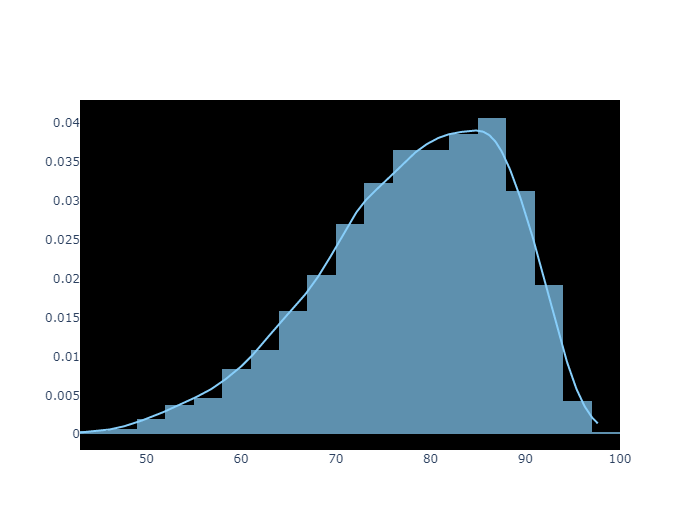

In [48]:
group_labels = ['10Percentage']
fig_5 = ff.create_distplot([df['10percentage']],group_labels,colors=['lightskyblue'],show_rug=False,bin_size=[3])
fig_5.update_layout(plot_bgcolor='black',showlegend=False,height=530)
fig_5.update_xaxes(showgrid=False,zeroline=False)
fig_5.update_yaxes(showgrid=False,zeroline=False)
fig_5.show('png')

In [49]:
morethan_average('10percentage')

% of employees having more than average 10percentage:  55.42916235780765


#### Measure of Central Tendency

In [50]:
central_tendency('10percentage')

Mean(Average) for 10percentage is:         77.96168821096173
Median for 10percentage is:                79.2
Mode(Mostly repeated) for 10percentage is: 78.0


#### Measure of Spread

In [51]:
spread('10percentage')

The Range is:                 54.760000000000005
The Quartiles Q1, Q2, Q3 are: (71.8,79.2,85.76)
The Inter-Quartile Range is   13.960000000000008
The Lower and Upper Bound is: (50.859999999999985,106.70000000000002)
Variance is:                  96.98732357796287
Standard Deviation is:        9.848214232944105


#### Measure of shape

In [52]:
df['10percentage'].kurt()

-0.10923414870996373

In [53]:
df['10percentage'].skew()

-0.5908641506712584

#### Observation:
* The skewness for 10th Percentage is -0.59 which is between -1 than -0.5
* The distribution is moderately skewed

* The Kurtosis for 10th Percentage is -0.1 which is less than 3.
* Hence it is a Playtkurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.

## 6. Distplot for Graduation GPA

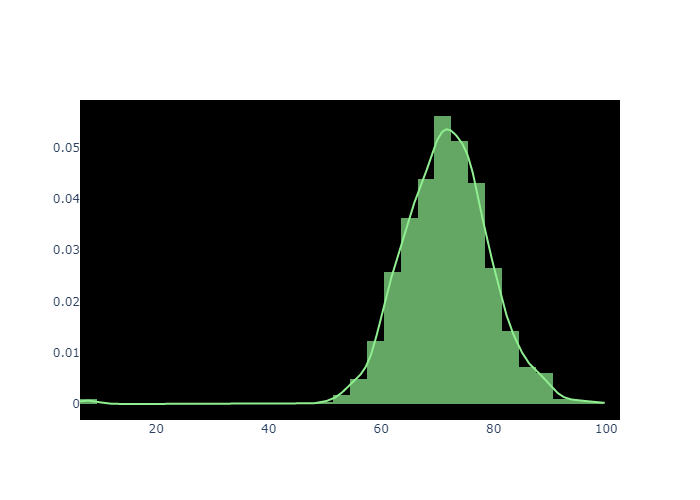

In [54]:
group_labels = ['Graduation GPA']
fig6 = ff.create_distplot([df['collegeGPA']],group_labels,colors=['lightgreen'],show_rug=False,bin_size=[3])
fig6.update_layout(plot_bgcolor='black',showlegend=False,height = 500)
fig6.update_xaxes(showgrid=False)
fig6.update_yaxes(showgrid=False,zeroline=False)
fig6.show('png')

In [55]:
morethan_average('collegeGPA')

% of employees having more than average collegeGPA:  50.90486039296794


#### Measure of Central Tendency

In [56]:
central_tendency('collegeGPA')

Mean(Average) for collegeGPA is:         71.51590486039296
Median for collegeGPA is:                71.8
Mode(Mostly repeated) for collegeGPA is: 70.0


#### Measure of Spread

In [57]:
spread('collegeGPA')

The Range is:                 93.48
The Quartiles Q1, Q2, Q3 are: (66.5575,71.8,76.3375)
The Inter-Quartile Range is   9.780000000000001
The Lower and Upper Bound is: (51.8875,91.00750000000001)
Variance is:                  67.00151009386828
Standard Deviation is:        8.185445015017098


#### Measure of Shape

In [58]:
df['collegeGPA'].skew()

-1.2881293802139078

In [59]:
df['collegeGPA'].kurt()

10.515906691256337

#### Observation:
* The skewness for GPA is -1.288 which is less than -1
* The distribution is highly negative skewed.
* The Kurtosis for GPA is 10.51 which is greater than 3.
* Hence it is a Leptokurtic.
* They produces more outliers than the normal distribution


## 7. Violin Plot for English Score

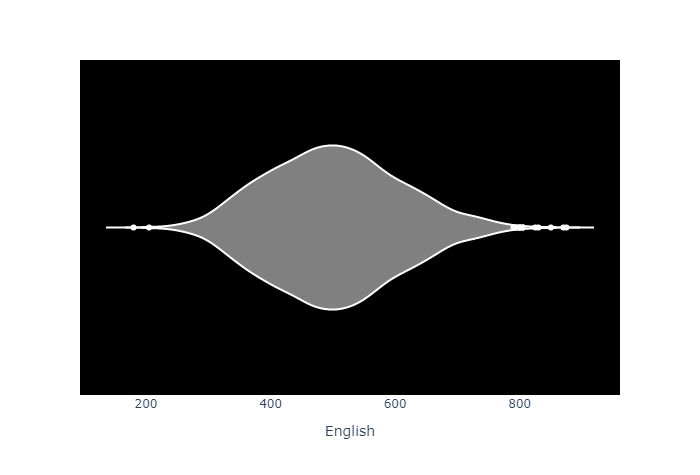

In [60]:
fig7 = px.violin(df1,x='English',color=' ',color_discrete_map={
                " ": "white"})
fig7.update_layout(plot_bgcolor='black',showlegend=False,height=475)

fig7.update_xaxes(showgrid=False)
fig7.update_yaxes(showgrid=False)
fig7.show('png')

In [61]:
morethan_average('English')

% of employees having more than average English:  48.526370217166495


#### Measure of Central Tendency

In [62]:
central_tendency('English')

Mean(Average) for English is:         501.6476215098242
Median for English is:                500.0
Mode(Mostly repeated) for English is: 475


#### Measure of Spread

In [63]:
spread('English')

The Range is:                 695
The Quartiles Q1, Q2, Q3 are: (425.0,500.0,570.0)
The Inter-Quartile Range is   145.0
The Lower and Upper Bound is: (207.5,787.5)
Variance is:                  11008.602717382439
Standard Deviation is:        104.92188864761461


#### Measure of Shape

In [64]:
df['English'].skew()

0.19687109849309445

In [65]:
df['English'].kurt()

-0.24063281760978406

#### Observation:
* The skewness for English Score is 0.19 which is  between -0.5 and 0.5
* The distribution is approximately Symentric.
* The Kurtosis for English Score is -0.24 which is less than 3.
* Hence it is a Platykurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.

## 8. Violin Plot for Logical Score

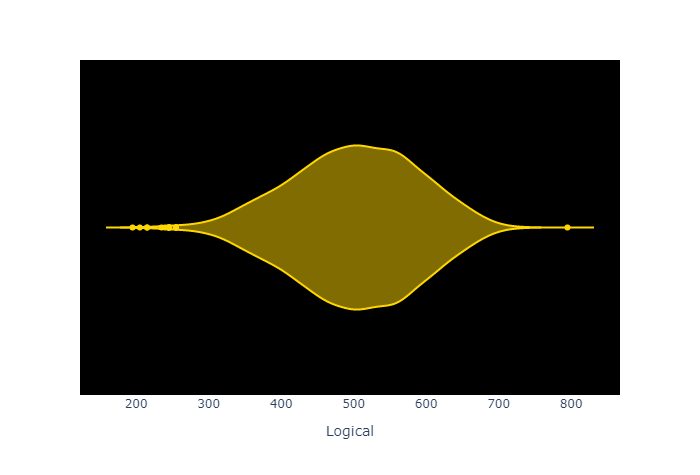

In [66]:
fig8 = px.violin(df1,x='Logical',color=' ',color_discrete_map={
                " ": "gold"})
fig8.update_layout(plot_bgcolor='black',showlegend=False,height=475)

fig8.update_xaxes(showgrid=False)
fig8.update_yaxes(showgrid=False)
fig8.show('png')

In [67]:
morethan_average('Logical')

% of employees having more than average Logical:  51.654601861427096


#### Measure of Central Tendency

In [68]:
central_tendency('Logical')

Mean(Average) for Logical is:         502.07549120992763
Median for Logical is:                505.0
Mode(Mostly repeated) for Logical is: 495


#### Measure of Spread

In [69]:
spread('Logical')

The Range is:                 600
The Quartiles Q1, Q2, Q3 are: (445.0,505.0,565.0)
The Inter-Quartile Range is   120.0
The Lower and Upper Bound is: (265.0,745.0)
Variance is:                  7518.445812404112
Standard Deviation is:        86.70897192565549


#### Measure of Shape

In [70]:
df['Logical'].skew()

-0.21672449625886228

In [71]:
df['Logical'].kurt()

-0.25173761404451733

#### Observation:
* The skewness for logical Score is -0.21 which is  between -0.5 and 0.5
* The distribution is approximately Symentric.
* The Kurtosis for Logical Score is -0.25 which is less than 3.
* Hence it is a Platykurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.

## 9. Violin Plot for Quant Score

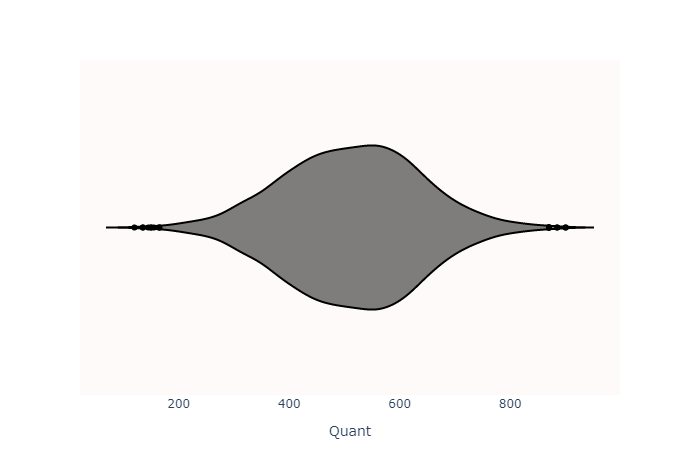

In [72]:
fig9 = px.violin(df1,x='Quant',color=' ',color_discrete_map={
                " ": "black"})
fig9.update_layout(plot_bgcolor='snow',showlegend=False,height=475)

fig9.update_xaxes(showgrid=False)
fig9.update_yaxes(showgrid=False)
fig9.show('png')

In [73]:
morethan_average('Quant')

% of employees having more than average Quant:  51.83557394002069


#### Measure of Central Tendency

In [74]:
central_tendency('Quant')

Mean(Average) for Quant is:         514.4607032057911
Median for Quant is:                515.0
Mode(Mostly repeated) for Quant is: 605


#### Measure of Spread

In [75]:
spread('Quant')

The Range is:                 780
The Quartiles Q1, Q2, Q3 are: (430.0,515.0,605.0)
The Inter-Quartile Range is   175.0
The Lower and Upper Bound is: (167.5,867.5)
Variance is:                  15010.768302789573
Standard Deviation is:        122.5184406642101


#### Measure of Shape

In [76]:
df['Quant'].skew()

-0.03370951464851897

In [77]:
df['Quant'].kurt()

-0.09368341239560563

#### Observation:
* The skewness for Quant Score is -0.03 which is  between -0.5 and 0.5
* The distribution is approximately Symentric.
* The Kurtosis for Quant Score is -0.09 which is less than 3.
* Hence it is a Platykurtic.
* The distribution produces fewer and less extreme outliers than does the normal distribution.

## 10. Histogram for Openness to Experience

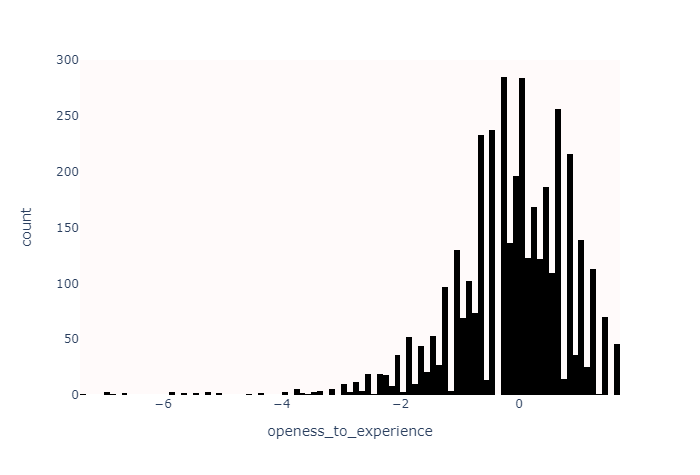

In [78]:
fig10 = px.histogram(df1,x='openess_to_experience',color=' ',color_discrete_map={
                " ": "black"})
fig10.update_layout(plot_bgcolor='snow',showlegend=False,height=475)

fig10.update_xaxes(showgrid=False)
fig10.update_yaxes(showgrid=False)
fig10.show('png')

In [79]:
morethan_average('openess_to_experience')

% of employees having more than average openess_to_experience:  57.44570837642192


#### Measure of Central Tendency

In [80]:
central_tendency('openess_to_experience')

Mean(Average) for openess_to_experience is:         -0.13796137538779596
Median for openess_to_experience is:                -0.0943
Mode(Mostly repeated) for openess_to_experience is: -0.0943


#### Measure of Spread

In [81]:
spread('openess_to_experience')

The Range is:                 9.0059
The Quartiles Q1, Q2, Q3 are: (-0.6692,-0.0943,0.5024)
The Inter-Quartile Range is   1.1716
The Lower and Upper Bound is: (-2.4266,2.2598000000000003)
Variance is:                  1.0242062156114515
Standard Deviation is:        1.0120307384716394


#### Measure of Shape

In [82]:
df['openess_to_experience'].skew()

-1.5242150220181359

In [83]:
df['openess_to_experience'].kurt()

5.870470744577276

#### Observation:
* The skewness for Openess to Experience is -1.53 which is  less than -1
* The distribution is Highly Negative Skewed.
* The Kurtosis for Openess to Experience is 5.87 which is greater than 3.
* Hence it is a Leptokurtic, where tails are longer and central peak is taller and sharper.

## 11. Histogram for conscientiousness

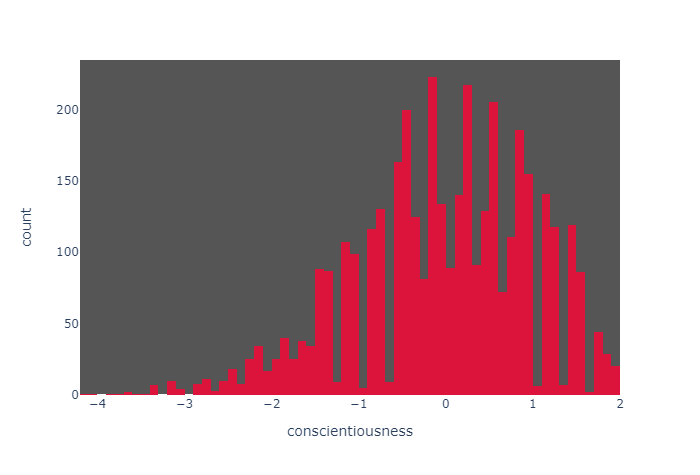

In [84]:
fig11 = px.histogram(df1,x='conscientiousness',color=' ',color_discrete_map={
                " ": "crimson"})
fig11.update_layout(plot_bgcolor='#555555',showlegend=False,height=475)

fig11.update_xaxes(showgrid=False)
fig11.update_yaxes(showgrid=False)
fig11.show('png')

In [85]:
morethan_average('conscientiousness')

% of employees having more than average conscientiousness:  54.05894519131335


#### Measure of Central Tendency

In [86]:
central_tendency('conscientiousness')

Mean(Average) for conscientiousness is:         -0.03838552223371267
Median for conscientiousness is:                0.0464
Mode(Mostly repeated) for conscientiousness is: 0.2718


#### Meassure of Spread

In [87]:
spread('conscientiousness')

The Range is:                 6.122
The Quartiles Q1, Q2, Q3 are: (-0.6555500000000001,0.0464,0.7027)
The Inter-Quartile Range is   1.35825
The Lower and Upper Bound is: (-2.692925,2.740075)
Variance is:                  1.0578350777422405
Standard Deviation is:        1.0285110975299394


#### Measure of Shape

In [88]:
df['conscientiousness'].skew()

-0.5219836268534231

In [89]:
df['conscientiousness'].kurt()

0.11090727869107564

#### Observation:
* The skewness for conscientiousness is -0.52 which is between -1 and -0.5
* The distribution is moderately Negative Skewed.
* The Kurtosis for conscientiousness is 0.11 which is less than 3.
* Hence it is a Platykurtic, the tails are shorter and central peak is lower and broader
* Distribution produces fewer and less extreme outliers than does the normal distribution..

In [90]:
#AGE
df['Age_group'] = pd.cut(df.Age, [0,20,30,40,50,60,100], labels =["<20","20-30","30-40","40-50","50-60","60+"])

#SALARY
df['Salary_group'] = pd.cut(df.Salary, [0,50000,100000,500000,1000000,2000000,4000000], 
                      labels =['<50000','50000-100000','100000-500000','500000-1000000','1000000-2000000','2000000-4000000'])

#AMCAT_Score
df['AMCAT_group'] = pd.cut(df['AMCAT_Score'],[0,250,500,1000,1250,1500,2000], 
                           labels =['<250','250-500','500-1000','1000-1250','1250-1500','1500-2000'])

#Graduation_GPA
df['GPA_group'] = pd.cut(df.collegeGPA, [0,50,60,70,80,90,100], labels =["<50","50-60","60-70","70-80","80-90","90+"])

##### Creating Bins for required columns

In [91]:
df.Age_group.value_counts(normalize = True)

20-30    0.541882
30-40    0.457859
40-50    0.000259
<20      0.000000
50-60    0.000000
60+      0.000000
Name: Age_group, dtype: float64

#### Observation
- More than 50% of the employees are in the age group of 20-30
- Around 99% of the employees are in the age group of 20-40

In [92]:
df['Salary_group'].value_counts(normalize = True)

100000-500000      0.864529
500000-1000000     0.070321
50000-100000       0.052740
1000000-2000000    0.006980
<50000             0.003102
2000000-4000000    0.002327
Name: Salary_group, dtype: float64

#### Observation
- More than 85% of the employees earns salary between 1 lakh to 5 lakhs.

In [93]:
df['AMCAT_group'].value_counts(normalize = True)

500-1000     0.548087
250-500      0.347466
1000-1250    0.075233
<250         0.014219
1250-1500    0.013185
1500-2000    0.001810
Name: AMCAT_group, dtype: float64

#### Observation
- More than 50% of the employees AMCAT score lies between 500-1000.
- only 10% of the employees have scored more than 1000 in AMCAT

In [94]:
df['GPA_group'].value_counts(normalize = True)

70-80    0.455016
60-70    0.368666
80-90    0.111686
50-60    0.052223
90+      0.008532
<50      0.003878
Name: GPA_group, dtype: float64

#### Observation
- More than 85% of the employees have graduation GPA more than 60.
- Only few i.e, around 0.8% of the employees have secured more than 90 GPA

In [95]:
df['Gender'].value_counts(normalize=True)

m    0.760858
f    0.239142
Name: Gender, dtype: float64

#### Observation
- 76% of the employees are Male employees
- 24% of the employees are Female employees

In [96]:
# Creating Datasets based on gender
df_M = df[df['Gender'] == 'm']
df_F = df[df['Gender'] == 'f']

## 12. Count of Employees Age

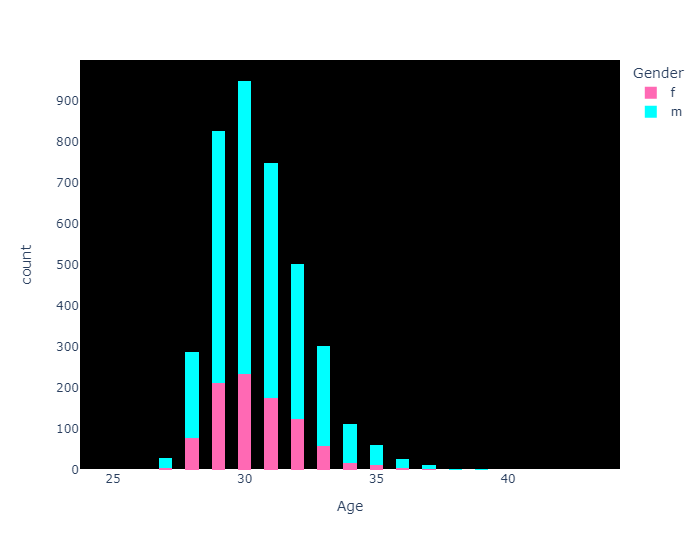

In [97]:
fig12 = px.histogram(df.dropna(),x='Age',color='Gender',color_discrete_map={
                "m": "cyan",
                "f": "hotpink"},nbins=41)
fig12.update_layout(plot_bgcolor='black',height=550)
fig12.update_yaxes(showgrid=False)
fig12.show('png')

In [98]:
df['Age'].value_counts(normalize=True)

30    0.245346
29    0.213806
31    0.193640
32    0.129783
33    0.077818
28    0.074457
34    0.029214
35    0.015512
27    0.007756
36    0.006980
37    0.003361
38    0.000776
39    0.000517
24    0.000259
44    0.000259
26    0.000259
40    0.000259
Name: Age, dtype: float64

#### Observation
- Most of the employees are in age group of 25-35
- 45% of the employees are of age 29 & 30
- There is only 1 employee of age more than 40
- There are 624 Male and 201 Female employees which are having the age of 30 years
* For both the Genders the distribution is moderately Skewed

## 13. Top 10 locations having higher % of Employees

In [99]:
df['JobCity'] = df['JobCity'].replace(-1,np.nan)

In [100]:
top_10 = df['JobCity'].value_counts(normalize=True).reset_index().rename(columns = {'index':'JobCity','JobCity':'Count'})

In [101]:
top_10['Count(%)'] = (top_10['Count']*100)//1

In [102]:
top_10.head(10)

,JobCity,Count,Count(%)
0,Bangalore,0.180064,18.0
1,Noida,0.104355,10.0
2,Hyderabad,0.095294,9.0
3,Pune,0.082432,8.0
4,Chennai,0.077463,7.0
5,Gurgaon,0.055832,5.0
6,New Delhi,0.054955,5.0
7,Mumbai,0.030400,3.0
8,Kolkata,0.027477,2.0
9,Jaipur,0.012569,1.0


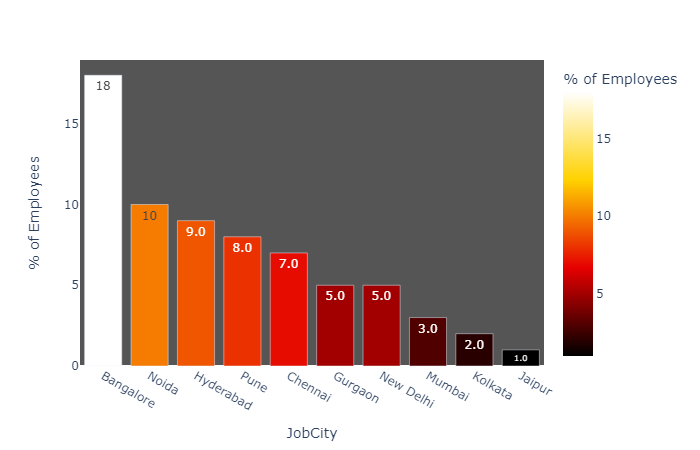

In [103]:
fig13 = px.bar(top_10.head(10), x='JobCity', y='Count(%)',color='Count(%)',labels={'Count(%)':'% of Employees'},
            color_continuous_scale=px.colors.sequential.Hot,
             text='Count(%)')
            
fig13.update_traces(texttemplate='%{text:.2s}',textposition='inside',textfont_size=12)
fig13.update_layout(plot_bgcolor='#555555',height=450)
fig13.update_yaxes(showgrid=False)
fig13.show('png')

### Observation
* More than 18% of the employees are working in Bangalore which is the highest among all other cities
* Jaipur is the 10th highest city having 1% of employees

## 14. Top 10 Designations having higher % of Employees

In [104]:
designation = df['Designation'].value_counts(normalize=True)[0:10].reset_index().rename(
    columns={'index':'Designation','Designation':'Count'})

In [105]:
designation['Count(%)'] = designation['Count']*100//1
designation

,Designation,Count,Count(%)
0,software engineer,0.136246,13.0
1,software developer,0.065667,6.0
2,system engineer,0.051706,5.0
3,programmer analyst,0.034643,3.0
4,systems engineer,0.029473,2.0
5,java software engineer,0.028180,2.0
6,software test engineer,0.025595,2.0
7,project engineer,0.019907,1.0
8,technical support engineer,0.019131,1.0
9,senior software engineer,0.018356,1.0


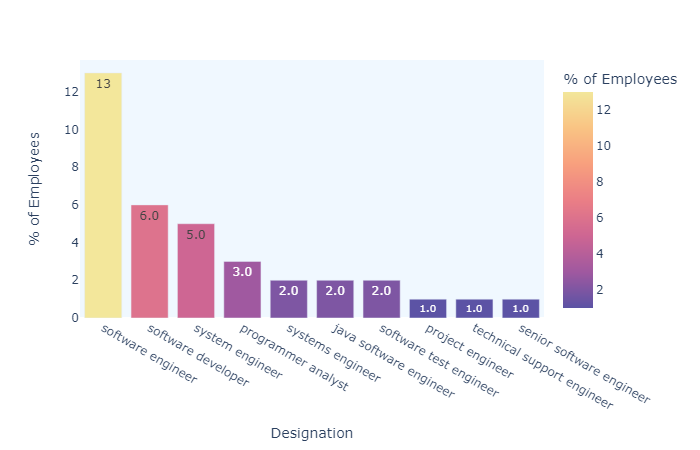

In [106]:
fig14 = px.bar(designation, x='Designation', y='Count(%)',color='Count(%)',
            labels={'Count(%)':'% of Employees'},text='Count(%)',
            color_continuous_scale=px.colors.sequential.Sunset_r)
      
fig14.update_traces(texttemplate='%{text:.2s}',textposition='inside',textfont_size=12)
fig14.update_layout(plot_bgcolor='aliceblue',height=450)
fig14.update_yaxes(showgrid=False)
fig14.show('png')

### Observation
* More than 13% of the Employees are working as a Software Engineer.
* 6% of the Employees are working as a Software Developer.
* Other than these designations there are less than 5% of the Employees

## 15. Salary based on Age

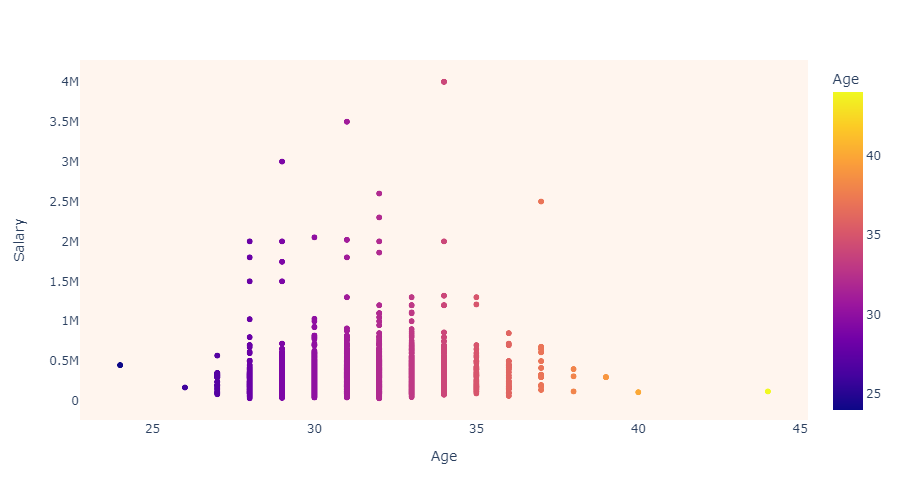

In [107]:
fig15 = px.scatter(df,y='Salary',x='Age',color='Age')
fig15.update_layout(height=500, width=900,plot_bgcolor='seashell')
fig15.update_xaxes(showgrid=False)
fig15.update_yaxes(showgrid=False,zeroline=False)
fig15.show('png')

#### Observation:
* The employees age lies in between 24 and 44
* The person of age 34 earns highest salary of 4M
* There are more number of outliers for the employees in the age group between 28-24

## 16. Salary based on Gender

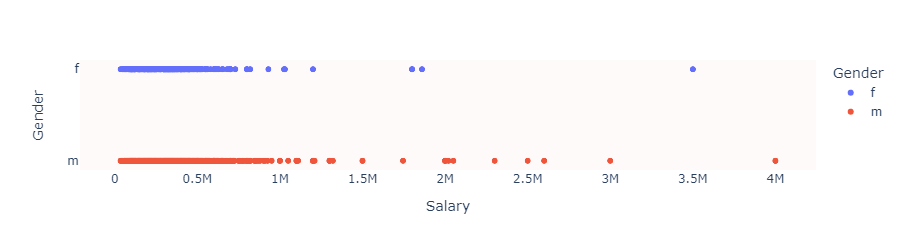

In [108]:
fig16 = px.scatter(df,x='Salary',y='Gender',color='Gender')
fig16.update_layout(height=250, width=900,plot_bgcolor='snow')
fig16.update_xaxes(showgrid=False,zeroline=False)
fig16.update_yaxes(showgrid=False)
fig16.show('png')

#### Observation:
* There are more number of outliers for both male & female employees w.r.t Salary.
* Maximum salary earned by a male employee is 4M
* Maximum salary earned by a female employee is 3.5M

## 17. Salary based on Degree

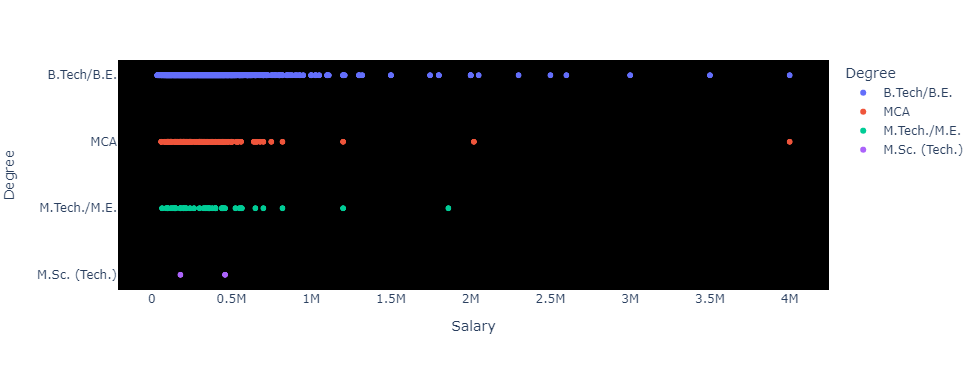

In [109]:
fig17 = px.scatter(df,x='Salary',y='Degree',color='Degree')
fig17.update_layout(height=370, width=980,plot_bgcolor='black')
fig17.update_xaxes(showgrid=False,zeroline=False)
fig17.update_yaxes(showgrid=False)
fig17.show('png')

#### Observation:
* There are more employees who have done graduation in B.Tech
* The highest salary for a employee based on graduation:
    1. B.Tech/B.E - 4M
    2. MCA - 4M
    3. M.Tech/M.E - 1.86M
    4. M.Sc. - 460K
* There are only two employees who have done graduation in M.Sc

## 18. % of employees who have graduated in top 5 specializations

In [110]:
by_specialization = df['Specialization'].value_counts(normalize=True).reset_index().rename(
    columns={'index':'Specialization','Specialization':'Total Employees'})
by_specialization['% of Employees'] = (by_specialization['Total Employees']*100)//1
by_specialization.head()

,Specialization,Total Employees,% of Employees
0,electronics and communication engineering,0.222596,22.0
1,computer science & engineering,0.185884,18.0
2,information technology,0.166753,16.0
3,computer engineering,0.152017,15.0
4,computer application,0.060238,6.0


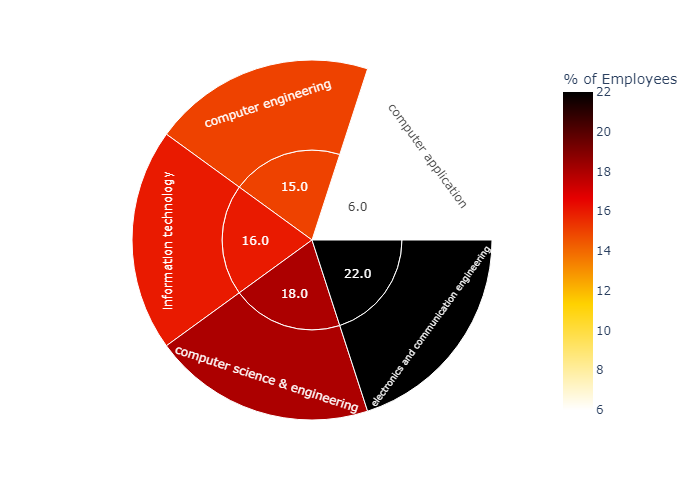

In [111]:
fig18 = px.sunburst(by_specialization.head(), path=['% of Employees','Specialization'],color='% of Employees',
                 color_continuous_scale=px.colors.sequential.Hot_r)
fig18.show('png')

#### Observation:
* More than 22% of the employees have done their specialization in Electrical & Communication Engineering
* Computer Applications is the 5th highest specialization where there are 6%  of employees who have done specialization in this field.

## 19. Salary based on College Tier & GPA

In [112]:
college_tier = df[(df['CollegeTier'] == 1) | (df['CollegeTier'] == 2)]

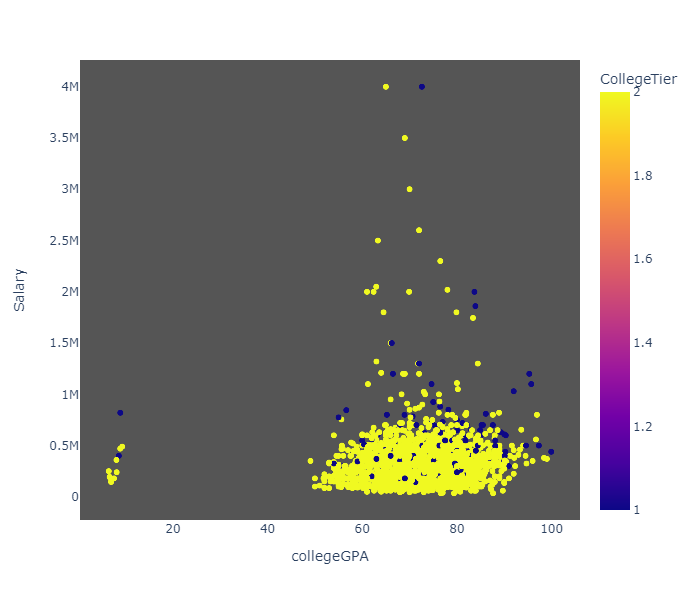

In [113]:
fig19 = px.scatter(college_tier,y='Salary',x='collegeGPA',color='CollegeTier')
fig19.update_layout(plot_bgcolor='#555555',height=600)
fig19.update_xaxes(showgrid=False,zeroline=False)
fig19.update_yaxes(showgrid=False,zeroline=False)
fig19.show('png')

In [114]:
df['CollegeTier'].value_counts(normalize=True)

2    0.925543
1    0.074457
Name: CollegeTier, dtype: float64

#### Observation:
* Around 93% of the Employees are from Tier-2 Colleges.
* Both Tier-1 & Tier-2 Employees has a maximum Salary of 4M
* Highest GPA of Tier-1 College Employee is 99.93 and salary is 440K
* Highest GPA of Tier-2 College Employee is 99 and salary is 370K

## 20. 12th Percentage Based on top boards

In [115]:
df['12board'].value_counts(normalize=True)[0:2].reset_index().rename(columns={'index':'12th_Board','12board':'Count'})

,12th_Board,Count
0,cbse,0.350569
1,state board,0.309979


In [116]:
top_2_boards = df[(df['12board'] == 'cbse') | (df['12board'] == 'state board')]

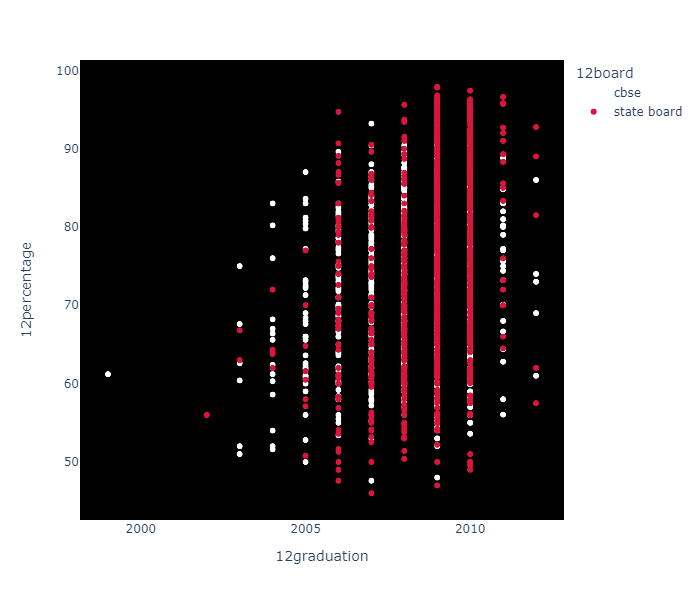

In [117]:
fig20 = px.scatter(top_2_boards,y='12percentage',x='12graduation',color='12board',color_discrete_map={
                "cbse": "white",
                "state board": "crimson"})
fig20.update_layout(plot_bgcolor='black',height=600)
fig20.update_xaxes(showgrid=False,zeroline=False)
fig20.update_yaxes(showgrid=False,zeroline=False)
fig20.show('png')

#### Observation:
* More than 35% of the Employees have completed their state board in CBSE
* Around 30% of the Employees are from State board
* Most of the employees have completed 12th in the year 2009 in State board.
* There are more number of employees who have completed their 12th in 2005 in CBSE.
* There is one employee who completed his graduation in before 2000.

## 21. Heatmap to check Correlation

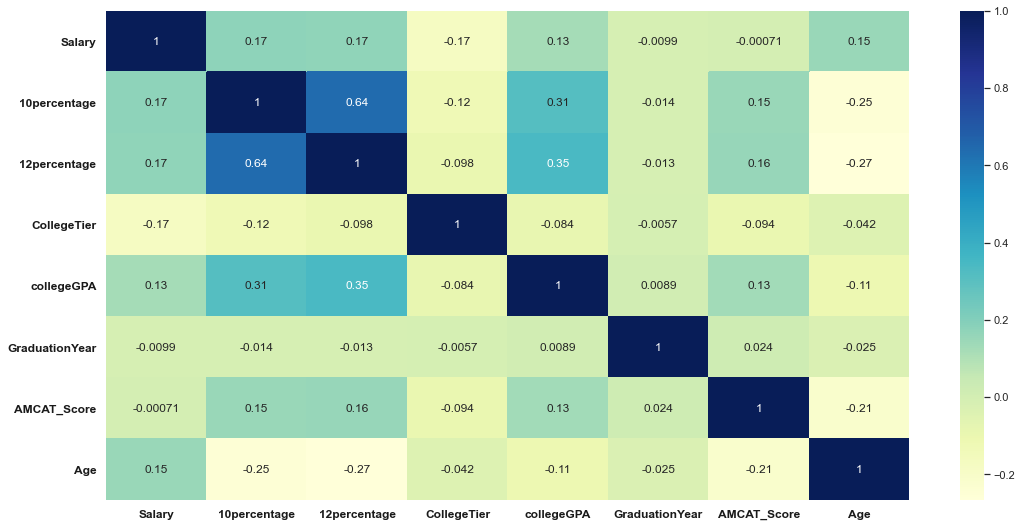

In [118]:
columns = ['Salary','10percentage','12percentage','CollegeTier','collegeGPA','GraduationYear','AMCAT_Score','Age']
data1 = df[columns]
correlation = data1.corr()
sns.set(rc={'figure.figsize':(18,9)})
sns.heatmap(correlation,annot=True,cmap="YlGnBu")
plt.xticks(fontsize=12,color='k',fontweight='bold')
plt.yticks(fontsize=12,color='k',fontweight='bold')
plt.show()

#### Observation:
* Correlation ranges from -1 to +1, Values closer to zero means there is no linear relationship between the two variables.
* The values near to 1 are more positively correlated i.e, if one variable increases the other also increases.
* The values near to -1 are more negatively correlated i.e, if one variable increases the other decreases.


